In [3]:
import scanpy as sc
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

sys.path.append("../utils/")
import pre_processing
import utils

ModuleNotFoundError: No module named 'utils'

In [4]:
%load_ext nb_black
%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'nb_black'

In [5]:
# path to results directory:
dir_out = "../../results/preIntergration/20241019_batch_split/"

In [6]:
adata_full = sc.read_h5ad("../../process/pre-intergration/big_data/20241019_lop10_hvg.h5ad")

In [7]:
# genes are from scib package
sgeneFile="../../data/genes/s_genes_tirosh.txt"
g2mgeneFile="../../data/genes/g2m_genes_tirosh.txt"

with open(sgeneFile) as f:
        s_genes = [x.strip() for x in f.readlines() if x.strip() in adata_full.var.index]
        
with open(g2mgeneFile) as f:
        g2m_genes = [x.strip() for x in f.readlines() if x.strip() in adata_full.var.index]

In [8]:
sc.tl.score_genes_cell_cycle(adata_full, s_genes, g2m_genes)

/tmp/ipykernel_2167968/715653071.py:1: FutureWarning: The specified parameters ('s_genes', 'g2m_genes') are no longer positional. Please specify them like `s_genes=['Mcm5', 'Pcna', 'Tyms', 'Fen1', 'Mcm2', 'Mcm4', 'Rrm1', 'Ung', 'Gins2', 'Mcm6', 'Cdca7', 'Dtl', 'Prim1', 'Uhrf1', 'Hells', 'Rfc2', 'Rpa2', 'Nasp', 'Rad51ap1', 'Gmnn', 'Wdr76', 'Slbp', 'Ccne2', 'Ubr7', 'Pold3', 'Msh2', 'Atad2', 'Rad51', 'Rrm2', 'Cdc45', 'Cdc6', 'Exo1', 'Tipin', 'Dscc1', 'Blm', 'Casp8ap2', 'Usp1', 'Clspn', 'Pola1', 'Chaf1b', 'Brip1', 'E2f8']`
  sc.tl.score_genes_cell_cycle(adata_full, s_genes, g2m_genes)


In [9]:
adata_full

AnnData object with n_obs × n_vars = 339489 × 36303
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'coarse_anno_1', 'total_counts', 'log10_total_counts', 'n_genes_detected', 'mito_frac', 'ribo_frac', 'compl', 'size_factors', 'Sample', 'Project', 'Core_datasets', 'Mandibular_Maxillary', 'Molar_Incisor', 'Tooth position', 'Histology', 'Sex', 'Gene Type', 'Knockout_gene', 'Cre', 'Treatment', 'FACs', 'Age', 'Stage', 'Development stage', 'Disease', 'Strain', 'Dissociation_enzyme', 'Machine', 'Species', 'Related assay', 'Journal', 'Data Source', 'Data location', 'new_totals_log', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'S_score', 'G2M_score', 'phase'
    var: 'gene_symbols', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dis

In [10]:
def check_if_nan(value):
    """return Boolean version of value that is True if value is
    some type of NaN (e.g. np.nan, None, "nan" etc).
    Example use:
    none_entries = subadata.obs.applymap(check_if_nan)
    subadata.obs = subadata.obs.mask(none_entries.values)
    """
    if value == "nan":
        return True
    elif value == None:
        return True
    if isinstance(value, float):
        if np.isnan(value):
            return True
    if value == "ND":
        return True
    return False

In [11]:
adata_full

AnnData object with n_obs × n_vars = 339489 × 36303
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'coarse_anno_1', 'total_counts', 'log10_total_counts', 'n_genes_detected', 'mito_frac', 'ribo_frac', 'compl', 'size_factors', 'Sample', 'Project', 'Core_datasets', 'Mandibular_Maxillary', 'Molar_Incisor', 'Tooth position', 'Histology', 'Sex', 'Gene Type', 'Knockout_gene', 'Cre', 'Treatment', 'FACs', 'Age', 'Stage', 'Development stage', 'Disease', 'Strain', 'Dissociation_enzyme', 'Machine', 'Species', 'Related assay', 'Journal', 'Data Source', 'Data location', 'new_totals_log', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'S_score', 'G2M_score', 'phase'
    var: 'gene_symbols', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dis

In [12]:
covariates = [
    "Sample",
    "total_counts",
    "log10_total_counts",
    "mito_frac",
    "Machine",
    "Treatment",
    "Age",
    "coarse_anno_1",
    "Mandibular_Maxillary",
    "Molar_Incisor",
    
]

In [15]:
adata_full.obs.Project.unique()

['ToothNc_Junjun', 'ToothNiche_Hong', 'Molar_Raju', 'CAGE_Chiba', 'Epi_Chiba', ..., 'Peridontal_Nagata', 'Runx2_Shuo', 'Molar_Qian', 'MolarE145_Outie', 'MolarP12_Tomoko']
Length: 16
Categories (16, object): ['Atlas_Jan', 'CAGE_Chiba', 'Cycling_Rapolas', 'Epi_Chiba', ..., 'Runx2_Shuo', 'ToothNc_Junjun', 'ToothNiche_Hong', 'Tooth_Zheng']

In [16]:
study_of_interest = "ToothNc_Junjun"
adata = adata_full[adata_full.obs.Project == study_of_interest, :].copy()

In [20]:

sample_to_scplatform = adata.obs.groupby("Sample").agg({"Machine": "first"})
for i in range(10):
    np.random.shuffle(sample_to_scplatform.Machine)
    adata.obs["single_cell_platform_shuffled_" + str(i)] = adata.obs["Sample"].map(
        dict(
            zip(
                sample_to_scplatform.index,
                sample_to_scplatform.Machine,
            )
        )
    )
    covariates.append("single_cell_platform_shuffled_" + str(i))

/tmp/ipykernel_2167968/3300604672.py:3: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/3300604672.py:3: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/3300604672.py:3: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/33006

In [18]:
median_libsize = np.median(adata.X.sum(axis=1).flatten(), axis=1)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=median_libsize[0, 0])
sc.tl.pca(adata)
n_pcs = 50
var_explained = pd.DataFrame(index=range(n_pcs), columns=covariates + ["overall"])
for pc in range(n_pcs):
    y_true_unfiltered = adata.obsm["X_pca"][:, pc]
    var_explained.loc[pc, "overall"] = np.var(y_true_unfiltered)
    for cov in covariates:
        x = adata.obs[cov].values.copy()
        x_nans = np.vectorize(check_if_nan)(x)
        x = x[~x_nans]
        if len(x) != 0:
            y_true = y_true_unfiltered[~x_nans].reshape(-1, 1)
            if x.dtype in ["float32", "float", "float64"]:
                x = x.reshape(-1, 1)
            else:
                if len(set(x)) == 1:
                    var_explained.loc[pc, cov] = np.nan
                    continue
                x = pd.get_dummies(x)
            lrf = LinearRegression(fit_intercept=True).fit(
                x,
                y_true,
            )
            y_pred = lrf.predict(x)
            var_explained.loc[pc, cov] = np.var(y_pred)
total_variance_explained = np.sum(var_explained, axis=0).sort_values(ascending=False)
total_variance_explained_fractions = (
    total_variance_explained / total_variance_explained["overall"]
)

In [22]:
include_processing_site = False
total_variance_explained_clean = total_variance_explained_fractions[
    [
        x
        for x in total_variance_explained_fractions.index
        if not x.startswith("Processing_site_shuffled")
        and not x.startswith("single_cell_platform_shuffled")
    ]
]
total_variance_explained_clean["single_cell_platform_shuffled"] = np.mean(
    total_variance_explained_fractions[
        [
            x
            for x in total_variance_explained_fractions.index
            if x.startswith("single_cell_platform_")
        ]
    ]
)
stdev_single_cell_platform_shuffled = np.std(
    total_variance_explained_fractions[
        [
            x
            for x in total_variance_explained_fractions.index
            if x.startswith("single_cell_platform_")
        ]
    ]
)
if include_processing_site:
    total_variance_explained_clean["Processing_site_shuffled"] = np.mean(
        total_variance_explained_fractions[
            [
                x
                for x in total_variance_explained_fractions.index
                if x.startswith("Processing_site_shuffled")
            ]
        ]
    )
    stdev_processing_site_shuffled = np.std(
        total_variance_explained_fractions[
            [
                x
                for x in total_variance_explained_fractions.index
                if x.startswith("Processing_site_shuffled")
            ]
        ]
    )

In [23]:
total_variance_explained_clean.sort_values(ascending=False, inplace=True)

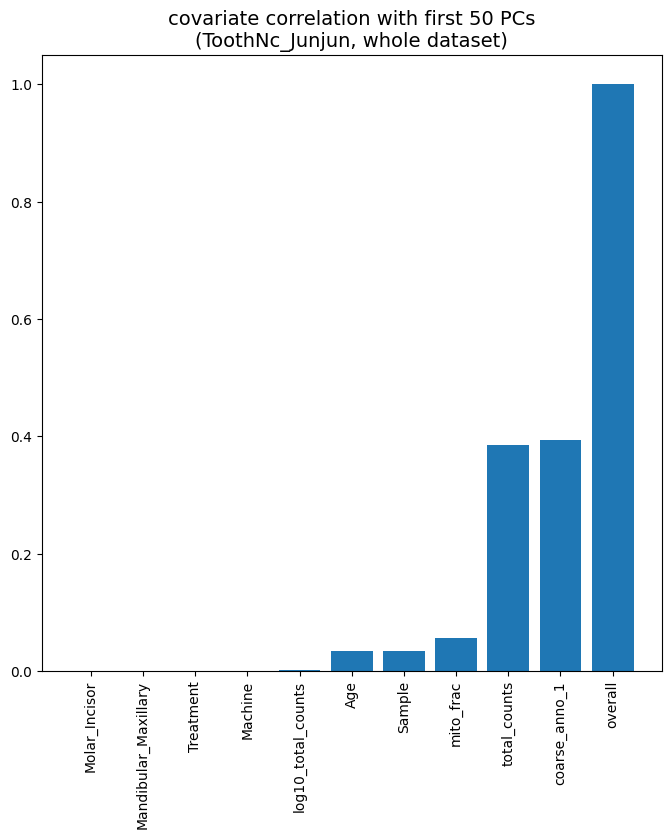

In [24]:
plt.figure(figsize=(8, 8))
plt.bar(
    total_variance_explained_clean[::-1].index,
    total_variance_explained_clean[::-1].values,
)
plt.title(
    f"covariate correlation with first 50 PCs\n({study_of_interest}, whole dataset)",
    fontsize=14,
)  # \n({dominant_type})
plt.xticks(rotation=90)
plt.savefig(f"{dir_out}/{study_of_interest}_barplot.pdf")
plt.show()


In [45]:
adata_full.X = adata_full.layers["counts"]

In [54]:
covariates

['Sample',
 'total_counts',
 'log10_total_counts',
 'mito_frac',
 'Machine',
 'Treatment',
 'Age',
 'coarse_anno_1',
 'Mandibular_Maxillary',
 'Molar_Incisor',
 'single_cell_platform_shuffled_0',
 'single_cell_platform_shuffled_1',
 'single_cell_platform_shuffled_2',
 'single_cell_platform_shuffled_3',
 'single_cell_platform_shuffled_4',
 'single_cell_platform_shuffled_5',
 'single_cell_platform_shuffled_6',
 'single_cell_platform_shuffled_7',
 'single_cell_platform_shuffled_8',
 'single_cell_platform_shuffled_9']

In [55]:
import numpy as np
import pandas as pd
import scanpy as sc
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def analyze_variance_explained(adata_full, study_of_interest, dir_out, include_processing_site=False):
    adata = adata_full[adata_full.obs.Project == study_of_interest, :].copy()
    sample_to_scplatform = adata.obs.groupby("Sample").agg({"Machine": "first"})
    covariates = [
    "Sample",
    "total_counts",
    "log10_total_counts",
    "mito_frac",
    "Machine",
    "Treatment",
    "Age",
    "coarse_anno_1",
    "Mandibular_Maxillary",
    "Molar_Incisor",
    ]
    for i in range(10):
        np.random.shuffle(sample_to_scplatform.Machine)
        adata.obs["single_cell_platform_shuffled_" + str(i)] = adata.obs["Sample"].map(
            dict(zip(sample_to_scplatform.index, sample_to_scplatform.Machine))
        )
        covariates.append("single_cell_platform_shuffled_" + str(i))

    median_libsize = np.median(adata.X.sum(axis=1).flatten())
    sc.pp.normalize_per_cell(adata, counts_per_cell_after=median_libsize[0, 0])
    sc.tl.pca(adata)
    
    n_pcs = 50
    var_explained = pd.DataFrame(index=range(n_pcs), columns=covariates + ["overall"])
    
    for pc in range(n_pcs):
        y_true_unfiltered = adata.obsm["X_pca"][:, pc]
        var_explained.loc[pc, "overall"] = np.var(y_true_unfiltered)
        for cov in covariates:
            x = adata.obs[cov].values.copy()
            x_nans = np.vectorize(check_if_nan)(x)
            x = x[~x_nans]
            if len(x) != 0:
                y_true = y_true_unfiltered[~x_nans].reshape(-1, 1)
                if x.dtype in ["float32", "float", "float64"]:
                    x = x.reshape(-1, 1)
                else:
                    if len(set(x)) == 1:
                        var_explained.loc[pc, cov] = np.nan
                        continue
                    x = pd.get_dummies(x)
                lrf = LinearRegression(fit_intercept=True).fit(
                    x,
                    y_true,
                )
                y_pred = lrf.predict(x)
                var_explained.loc[pc, cov] = np.var(y_pred)

    total_variance_explained = np.sum(var_explained, axis=0).sort_values(ascending=False)
    total_variance_explained_fractions = (
        total_variance_explained / total_variance_explained["overall"]
    )
    
    include_processing_site = False
    total_variance_explained_clean = total_variance_explained_fractions[
        [
            x
            for x in total_variance_explained_fractions.index
            if not x.startswith("Processing_site_shuffled")
            and not x.startswith("single_cell_platform_shuffled")
        ]
    ]
    total_variance_explained_clean["single_cell_platform_shuffled"] = np.mean(
        total_variance_explained_fractions[
            [
                x
                for x in total_variance_explained_fractions.index
                if x.startswith("single_cell_platform_")
            ]
        ]
    )
    stdev_single_cell_platform_shuffled = np.std(
        total_variance_explained_fractions[
            [
                x
                for x in total_variance_explained_fractions.index
                if x.startswith("single_cell_platform_")
            ]
        ]
    )
    if include_processing_site:
        total_variance_explained_clean["Processing_site_shuffled"] = np.mean(
            total_variance_explained_fractions[
                [
                    x
                    for x in total_variance_explained_fractions.index
                    if x.startswith("Processing_site_shuffled")
                ]
            ]
        )
        stdev_processing_site_shuffled = np.std(
            total_variance_explained_fractions[
                [
                    x
                    for x in total_variance_explained_fractions.index
                    if x.startswith("Processing_site_shuffled")
                ]
            ]
        )
    
    total_variance_explained_clean.sort_values(ascending=False, inplace=True)
    
    plt.figure(figsize=(8, 8))
    plt.bar(
        total_variance_explained_clean[::-1].index,
        total_variance_explained_clean[::-1].values,
    )
    plt.title(
        f"covariate correlation with first 50 PCs\n({study_of_interest}, whole dataset)",
        fontsize=14,
    )  # \n({dominant_type})
    plt.xticks(rotation=90)
    plt.savefig(f"{dir_out}/{study_of_interest}_barplot.pdf")
    plt.show()

# Usage example:
# analyze_variance_explained(adata_full, "ToothNc_Junjun", "/path/to/output")


In [56]:
projName = adata_full.obs.Project.unique()

/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/82793

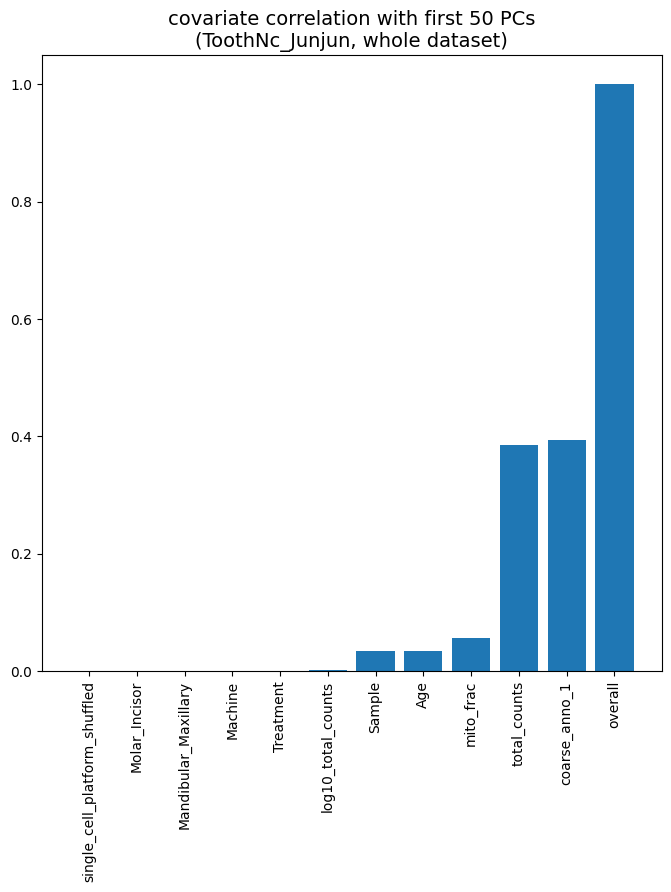

/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/82793

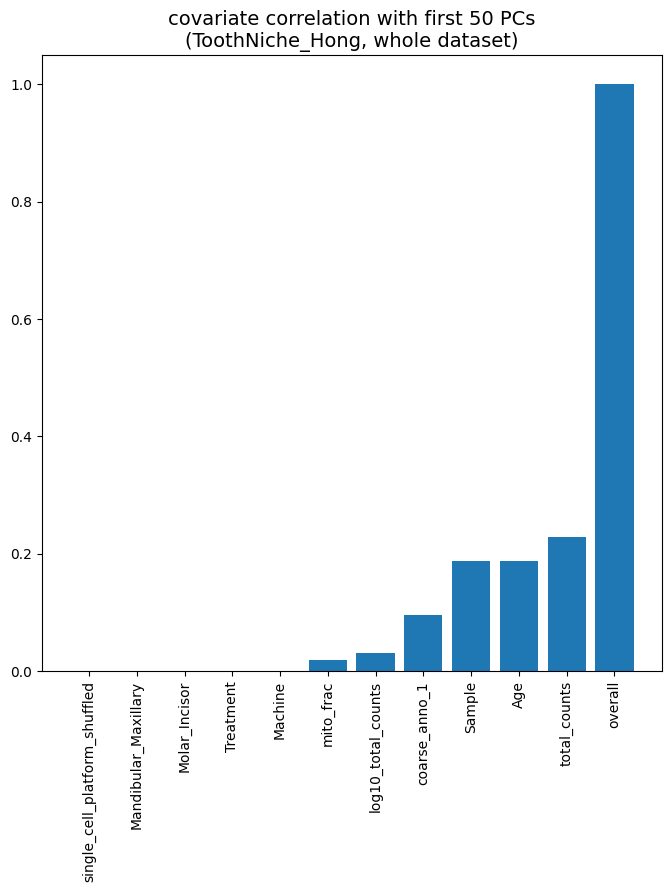

/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/82793

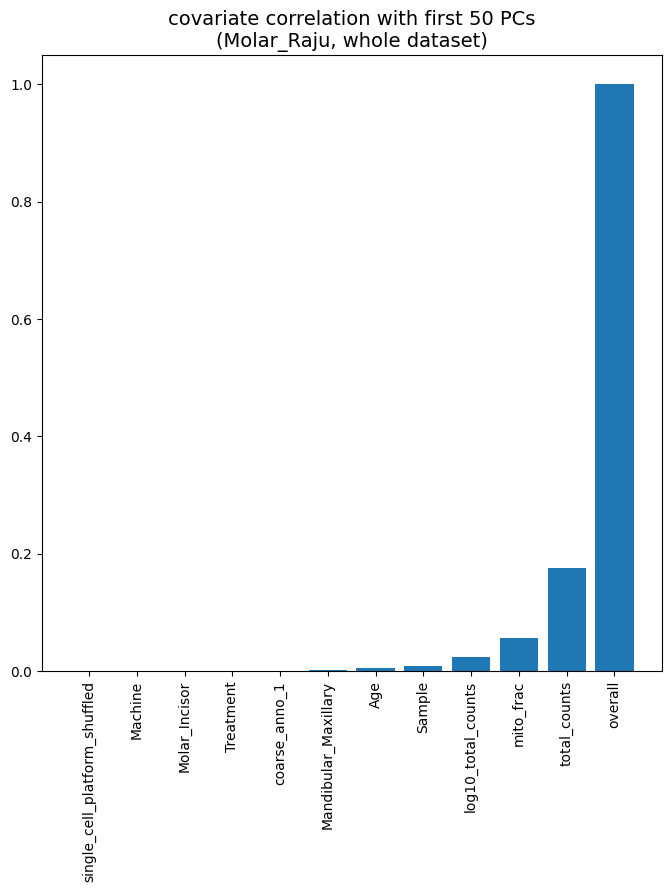

/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/82793

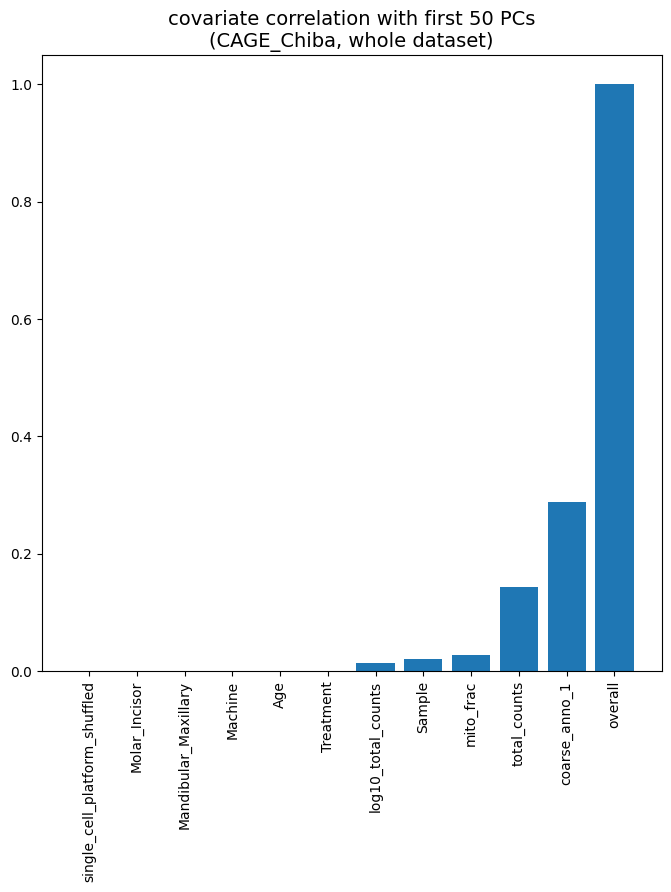

/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/82793

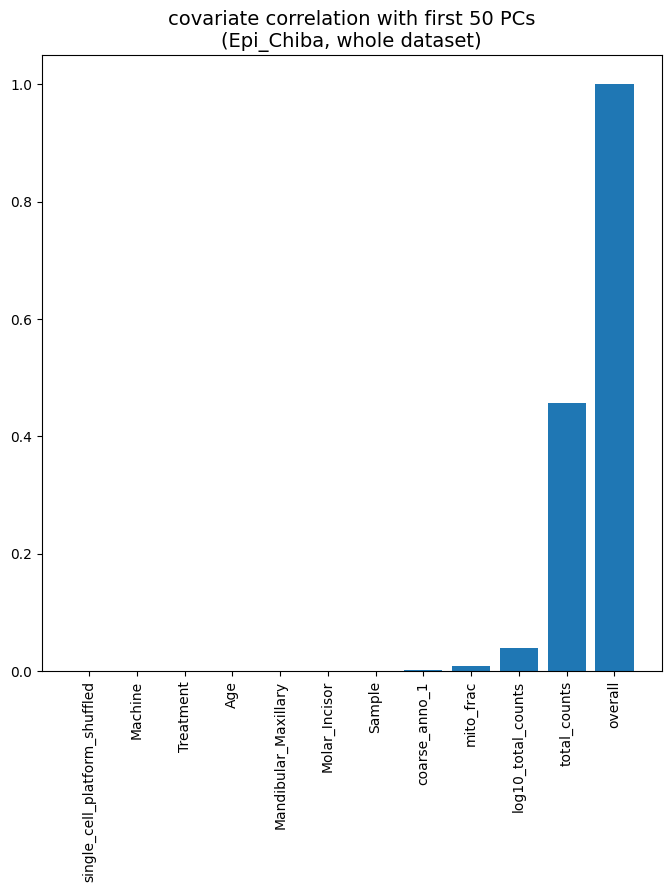

/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/82793

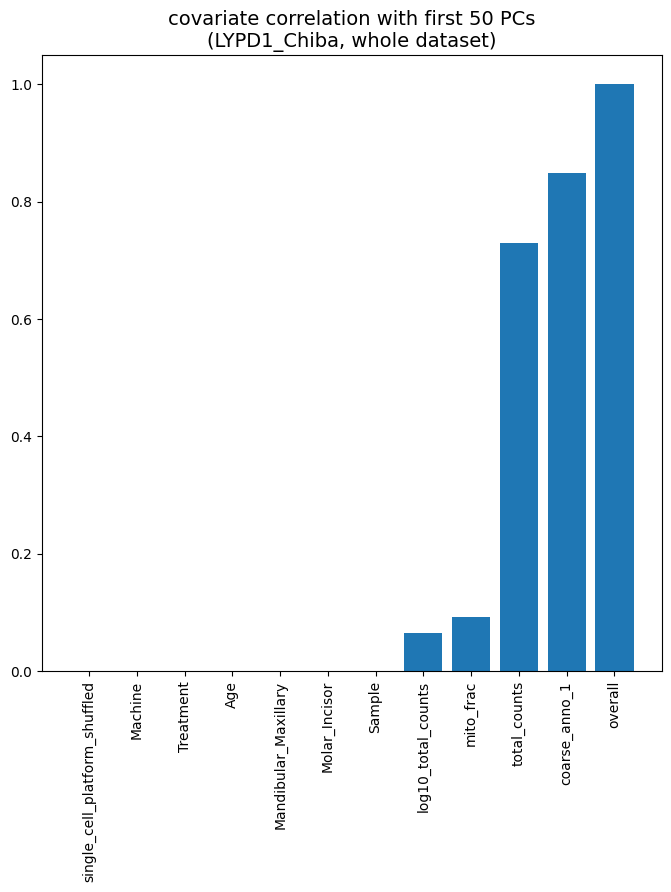

/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/82793

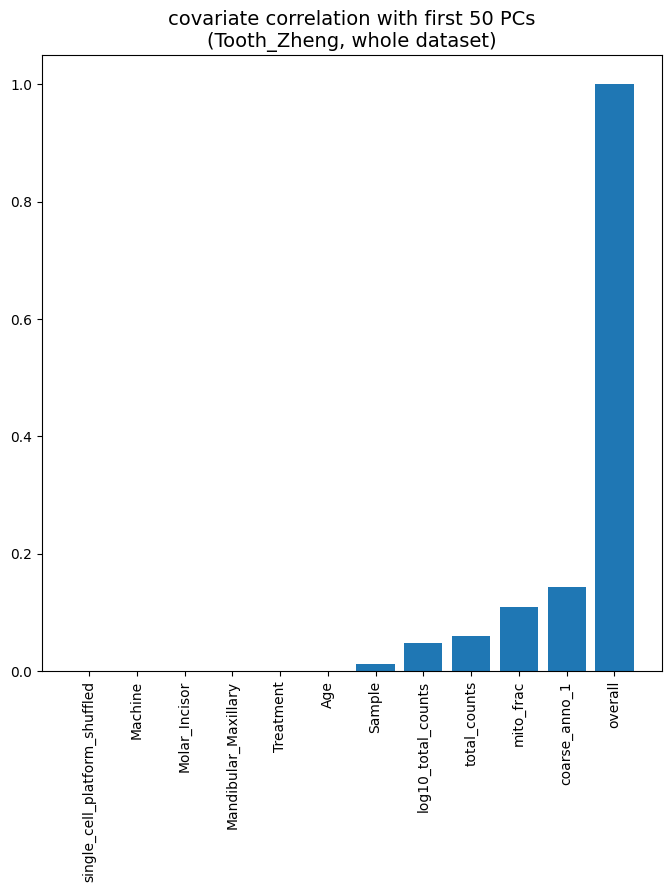

/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/82793

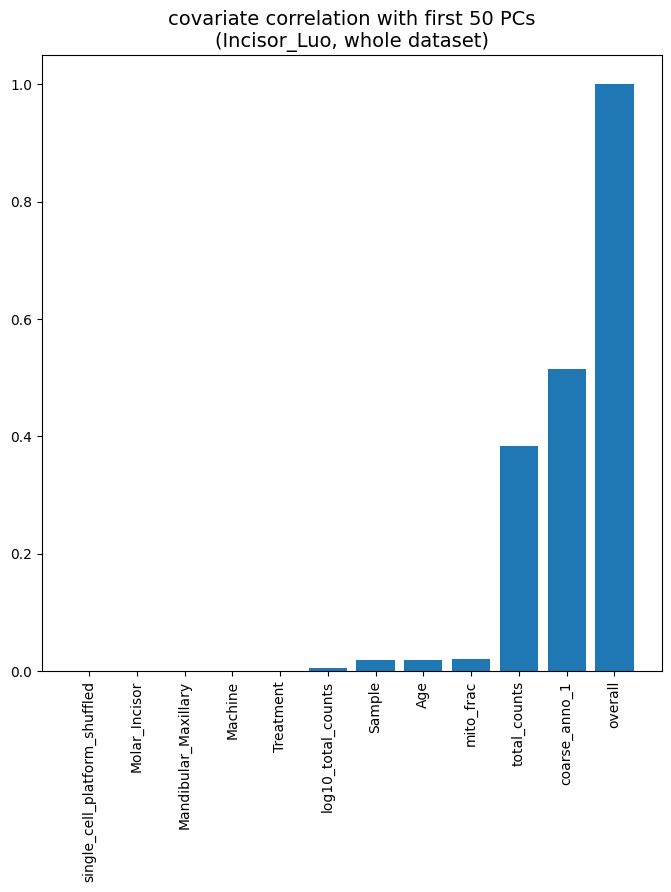

/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/82793

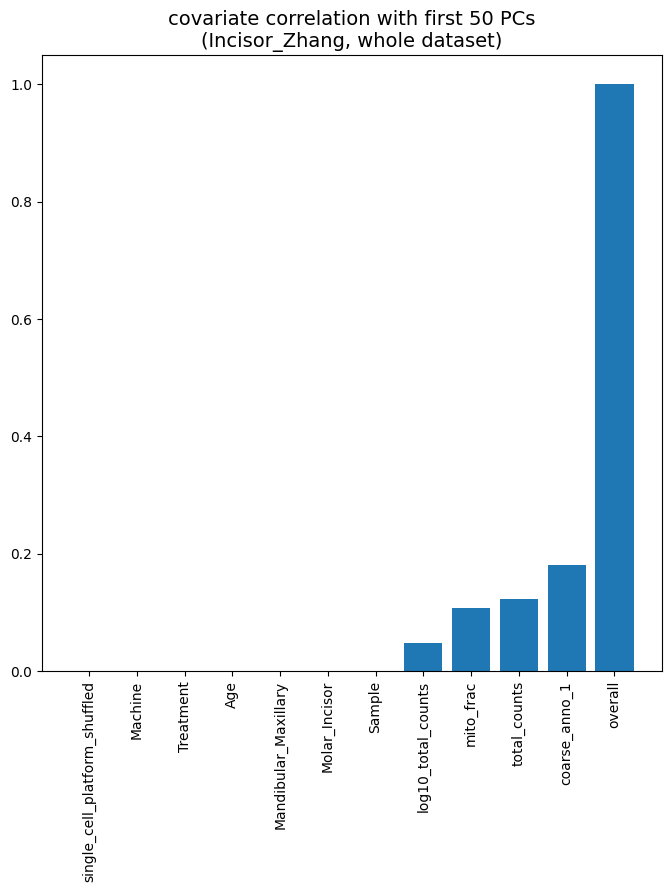

/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/82793

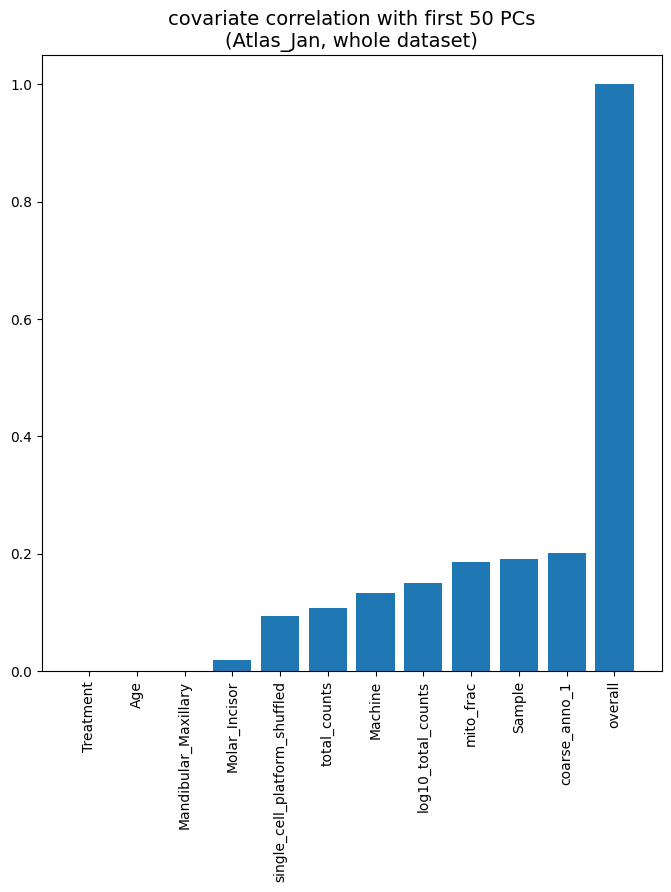

/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/82793

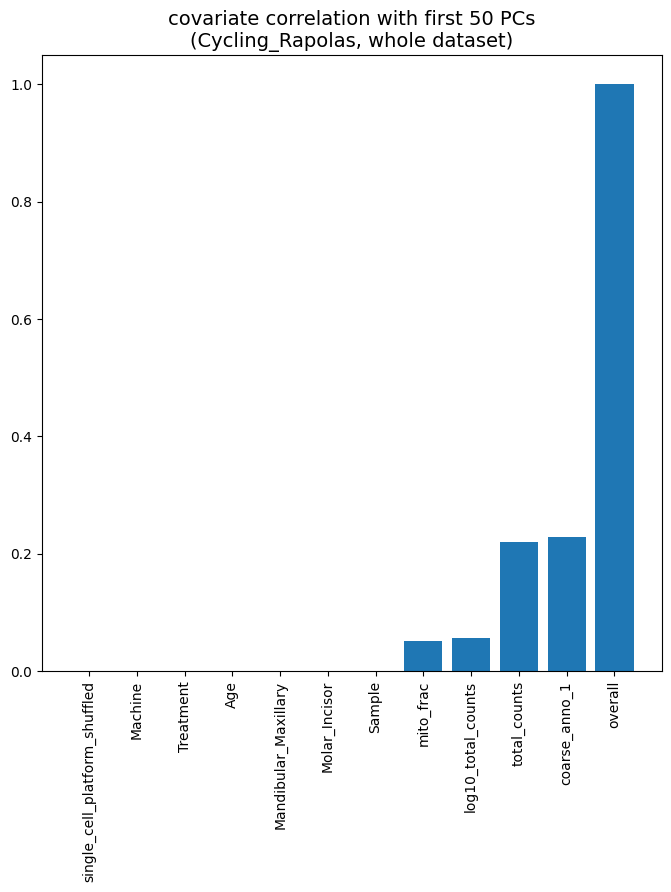

/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/82793

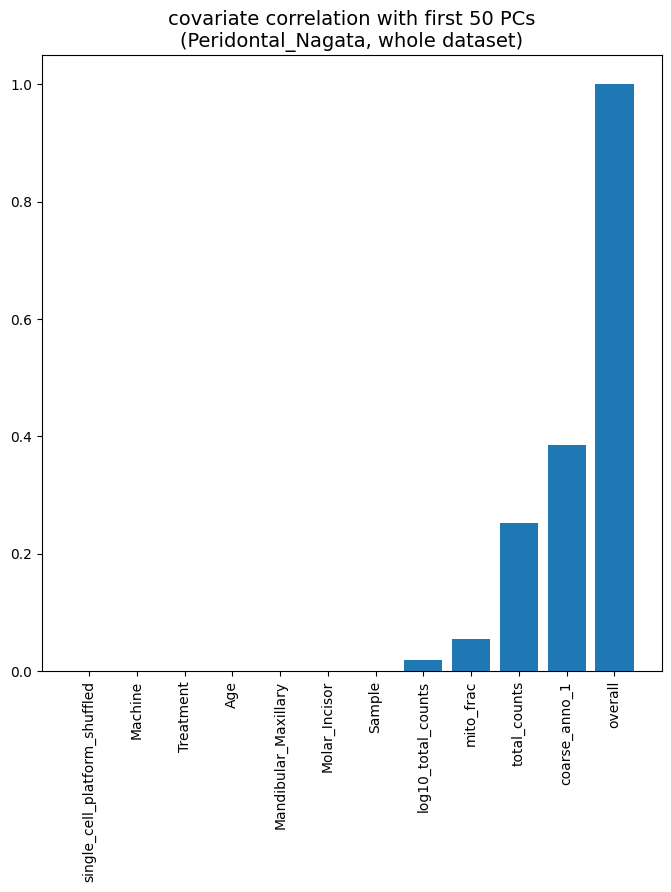

/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/82793

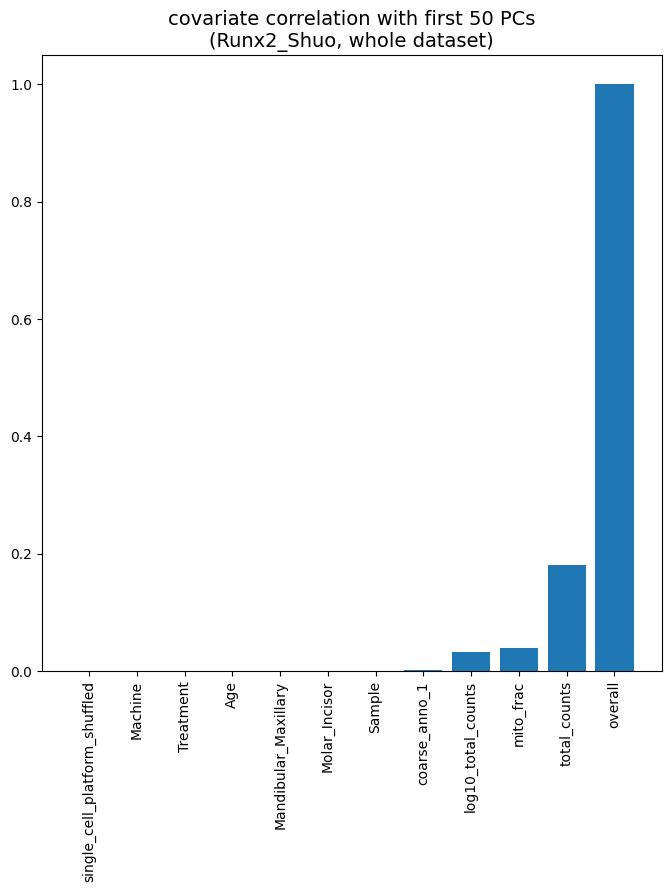

/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/82793

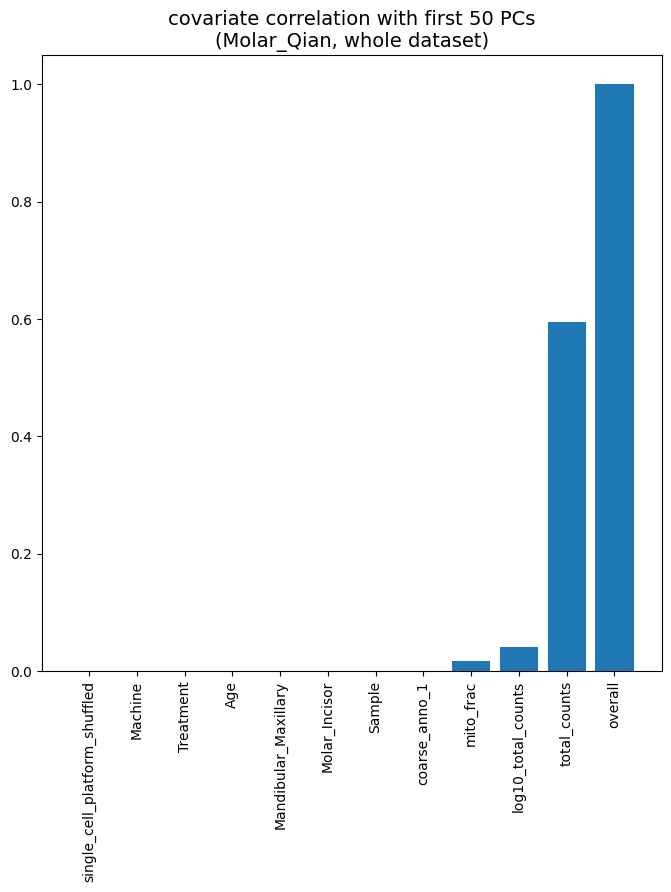

/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/82793

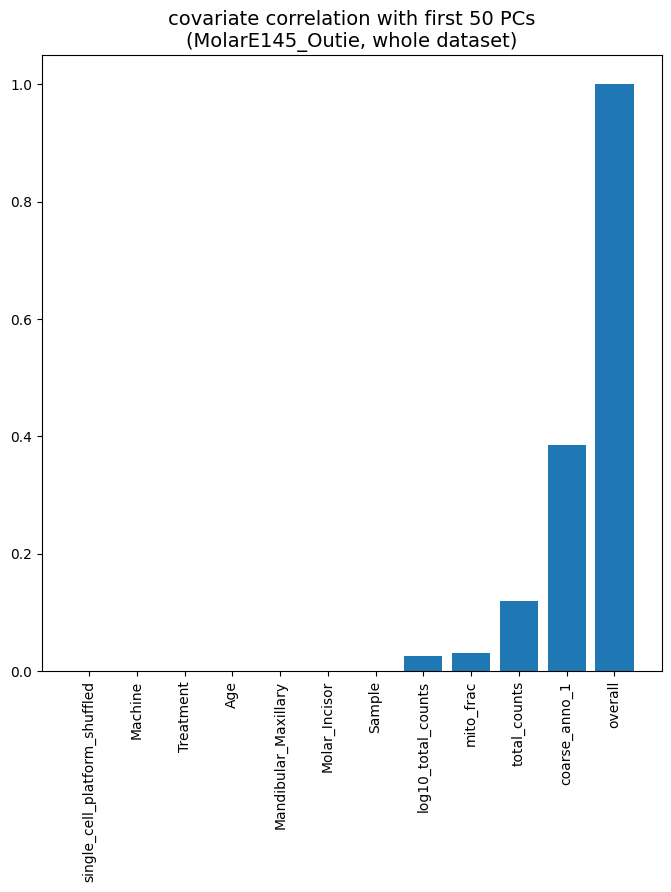

/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/827935831.py:23: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Machine)
/tmp/ipykernel_2167968/82793

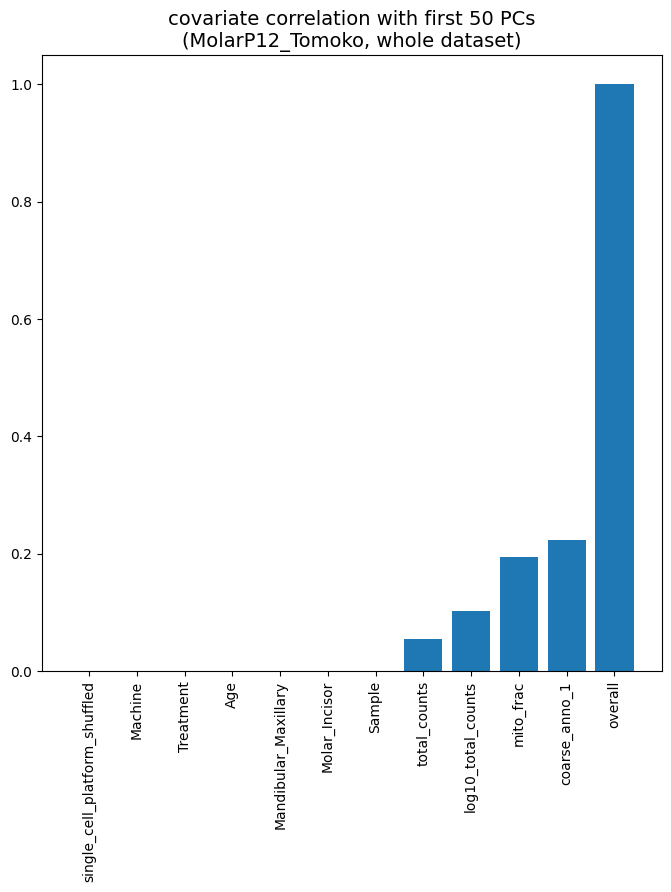

In [57]:
for i in projName:
    analyze_variance_explained(adata_full=adata_full, study_of_interest=i,dir_out=dir_out,include_processing_site=False )

In [46]:
median_libsize = np.median(adata.X.sum(axis=1).flatten())

In [47]:
median_libsize[0, 0]

11983.044424993352

In [34]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=median_libsize)

ValueError: non-broadcastable output operand with shape (76273,) doesn't match the broadcast shape (1,76273)

In [60]:
pd.DataFrame(adata_full.obs_names).to_csv("../../processed_data/attributeName/cellName.csv")

In [61]:
pd.DataFrame(adata_full.var_names).to_csv("../../processed_data/attributeName/varName.csv")